# Polynomial Regression

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data.

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  



### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

### 1- Read the data

In [3]:
df = pd.read_csv("AirQualityUCI.csv")

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [5]:
y = df['NO2(GT)']

In [6]:
df = df.drop(['CO(GT)','NMHC(GT)', 'C6H6(GT)', 'NOx(GT)'],axis=1)
x = df.drop('NO2(GT)', axis=1)

In [7]:
x

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


In [8]:
y

0       113.0
1        92.0
2       114.0
3       122.0
4       116.0
        ...  
9352    190.0
9353    179.0
9354    175.0
9355    156.0
9356    168.0
Name: NO2(GT), Length: 9357, dtype: float64

### 3- Handle missing data

In [9]:
df.isnull()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Date                0
Time                0
PT08.S1(CO)       366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [11]:
100* df.isnull().sum() / len(df)

Date              0.00000
Time              0.00000
PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
NO2(GT)          17.54836
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
dtype: float64

In [12]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [13]:
percent_nan = percent_missing(df)

In [14]:
percent_nan

PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
NO2(GT)          17.54836
dtype: float64

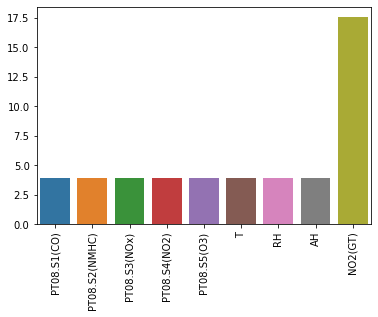

In [15]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 5.0)

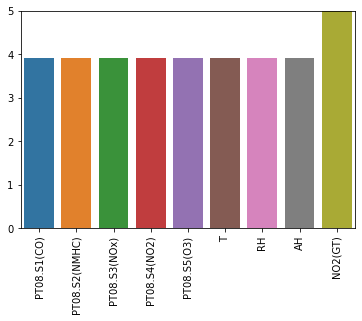

In [16]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,5)


In [17]:
### No features was removed because all features have the same null values percentage
### The highest null values appeared in the NO2 (OUTPUT), thus it cannot be removed 

In [18]:
### So the null values should be replaced or dropped

In [17]:
df = df.dropna(axis=0,subset= ['NO2(GT)'])

In [18]:
percent_nan = percent_missing(df)

In [19]:
df

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [20]:
df.isnull().sum()

Date               0
Time               0
PT08.S1(CO)      322
PT08.S2(NMHC)    322
PT08.S3(NOx)     322
NO2(GT)            0
PT08.S4(NO2)     322
PT08.S5(O3)      322
T                322
RH               322
AH               322
dtype: int64

In [21]:
df = df.dropna(axis=0,subset= ['PT08.S1(CO)'])

In [22]:
df.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [23]:
y = df['NO2(GT)']
x = df.drop('NO2(GT)', axis=1)

In [24]:
x

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


### 4- Replace date feature

In [25]:
df[['Day','Month','Year']] = df.Date.str.split("/", expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
df = df.drop('Date', axis=1)

### 5- Replace time feature

In [27]:
df[['Hours', 'Minutes', 'Seconds']] = df.Time.str.split(":", expand=True)

In [28]:
df = df.drop('Time', axis=1)

In [29]:
df

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,10,2004,18,00,00
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,10,2004,19,00,00
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,10,2004,20,00,00
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,10,2004,21,00,00
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,10,2004,22,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005,10,00,00
9353,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005,11,00,00
9354,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005,12,00,00
9355,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005,13,00,00


### 6- Apply feature scaling

In [30]:
x = df.drop('NO2(GT)', axis=1)
y = df['NO2(GT)']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler

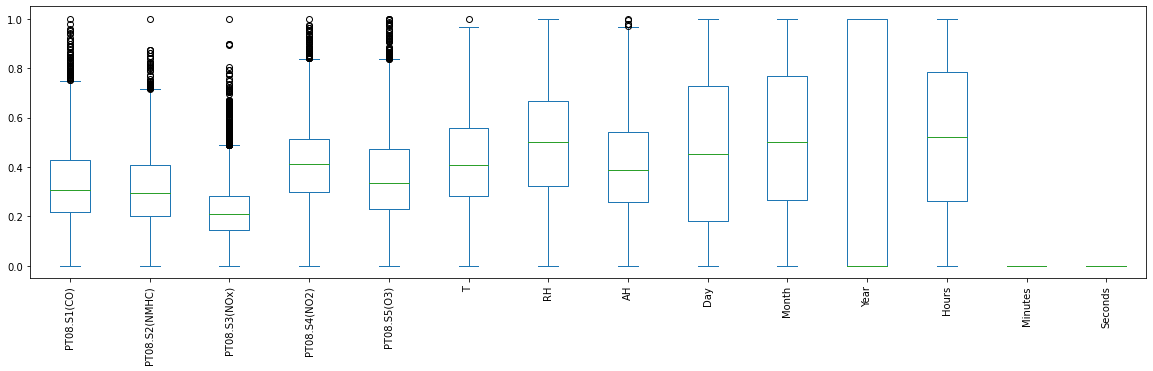

In [33]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

### 7- Evaluate different degrees of lasso CV polynomial regression

In [34]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [38]:
# TRAINING ERROR PER DEGREE
Lasso_train_rmse_errors = []
# TEST ERROR PER DEGREE
Lasso_test_rmse_errors = []
RmseMin=10000
index=0

for i in range (1,6):
    print(i)
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    norm = MinMaxScaler().fit(X_train)
    X_train_norm = norm.transform(X_train)
    X_test_norm = norm.transform(X_test)

    lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
    lasso_cv_model.fit(X_train_norm,y_train)
    test_predictions = lasso_cv_model.predict(X_test_norm)
    train_predictions = lasso_cv_model.predict(X_train_norm)

    MSE1 = mean_squared_error(y_test,test_predictions)
    TestRMSE = np.sqrt(MSE1)
    if(TestRMSE<RmseMin):
       RmseMin=TestRMSE
       index=i
       print(index)
    MSE2 = mean_squared_error(y_train,train_predictions)
    TrainRMSE = np.sqrt(MSE2)
    print(TestRMSE)
    Lasso_train_rmse_errors.append(TestRMSE)
    Lasso_test_rmse_errors.append(TrainRMSE)

1
1
23.845512952633587
2
2
23.256946675799693
3
3
23.222005149282747
4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+03, tolerance: 1.186e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


23.232433288089204
5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+03, tolerance: 1.186e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


5
23.206727570083


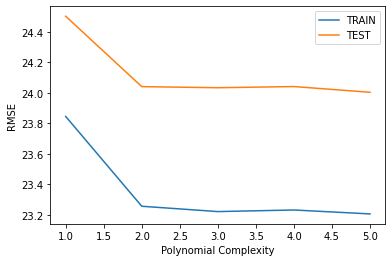

In [39]:
plt.plot(range(1,6),Lasso_train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),Lasso_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

In [40]:
#TODO
#correct degree
polynomial_converter = PolynomialFeatures(degree=index,include_bias=False)
poly_features = polynomial_converter.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train_norm,y_train)
test_predictions = lasso_cv_model.predict(X_test_norm)
train_predictions = lasso_cv_model.predict(X_train_norm)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+03, tolerance: 1.186e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [41]:
lasso_cv_model.alpha_

0.780666761884758

In [42]:
lassoMAE = mean_absolute_error(y_test,test_predictions)
lassoMSE = mean_squared_error(y_test,test_predictions)
lassoRMSE = np.sqrt(lassoMSE)

In [43]:
lassoRMSE

23.206727570083

In [44]:
lassoMAE

17.23005918000503

In [45]:
lasso_cv_model.coef_

array([ 0.,  0., -0., ...,  0.,  0.,  0.])

In [46]:
lasso_cv_model.get_params(deep=True)


{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.1,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [36]:
from sklearn.linear_model import RidgeCV

In [48]:
# TRAINING ERROR PER DEGREE
Ridge_train_rmse_errors = []
# TEST ERROR PER DEGREE
Ridge_test_rmse_errors = []
RmseMin=10000
index=0
for i in range (1,6):
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    norm = MinMaxScaler().fit(X_train)
    X_train_norm = norm.transform(X_train)
    X_test_norm = norm.transform(X_test)

    ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
    ridge_cv_model.fit(X_train_norm,y_train)
    test_predictions = ridge_cv_model.predict(X_test_norm)
    train_predictions = ridge_cv_model.predict(X_train_norm)

    MSE1 = mean_squared_error(y_test,test_predictions)
    TestRMSE = np.sqrt(MSE1)

    if(TestRMSE<RmseMin):
       RmseMin=TestRMSE
       index=i
       print(index)
    MSE2 = mean_squared_error(y_train,train_predictions)
    TrainRMSE = np.sqrt(MSE2)

    Ridge_train_rmse_errors.append(TestRMSE)
    Ridge_test_rmse_errors.append(TrainRMSE)


1
2
3
4
5


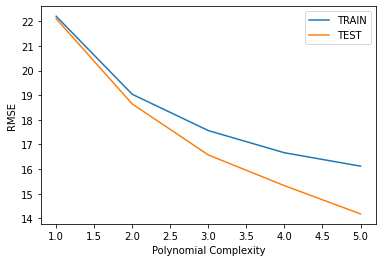

In [49]:
plt.plot(range(1,6),Ridge_train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),Ridge_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

In [37]:
polynomial_converter = PolynomialFeatures(degree=5,include_bias=False)
poly_features = polynomial_converter.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train_norm,y_train)
test_predictions = ridge_cv_model.predict(X_test_norm)
train_predictions = ridge_cv_model.predict(X_train_norm)


In [66]:
train_predictions

array([233.3846459 , 109.96987554, 128.28113694, ..., 114.28441553,
        28.48987395, 140.61064774])

In [69]:
x

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,3,10,2004,18,00,00
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,3,10,2004,19,00,00
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,3,10,2004,20,00,00
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,3,10,2004,21,00,00
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,3,10,2004,22,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005,10,00,00
9353,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005,11,00,00
9354,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005,12,00,00
9355,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005,13,00,00


In [67]:
X_train_norm

array([[0.66813834, 0.64593596, 0.05209657, ..., 0.        , 0.        ,
        0.        ],
       [0.66004415, 0.4729064 , 0.18932656, ..., 0.        , 0.        ,
        0.        ],
       [0.47608536, 0.39039409, 0.08640407, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.63870493, 0.66317734, 0.0969928 , ..., 0.        , 0.        ,
        0.        ],
       [0.13318617, 0.16071429, 0.38670055, ..., 0.        , 0.        ,
        0.        ],
       [0.47093451, 0.5270936 , 0.17407878, ..., 0.        , 0.        ,
        0.        ]])

In [51]:
ridgeMAE = mean_absolute_error(y_test,test_predictions)
ridgeMSE = mean_squared_error(y_test,test_predictions)
ridgeRMSE = np.sqrt(ridgeMSE)

In [52]:
ridgeMAE

11.169436334548346

In [53]:
ridgeRMSE

16.12026485875756

In [54]:
ridge_cv_model.coef_

array([ 26.69578426,  44.9489877 , -26.32678985, ...,   0.        ,
         0.        ,   0.        ])

In [55]:
ridge_cv_model.get_params(deep=True)

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': 'neg_mean_absolute_error',
 'store_cv_values': False}

### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [56]:
from sklearn.linear_model import ElasticNetCV

In [57]:
# TRAINING ERROR PER DEGREE
Elastic_train_rmse_errors = []
# TEST ERROR PER DEGREE
Elastic_test_rmse_errors = []
RmseMin=10000
index=0
for i in range (1,6):
    print(i)
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    norm = MinMaxScaler().fit(X_train)
    X_train_norm = norm.transform(X_train)
    X_test_norm = norm.transform(X_test)

    elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
    elastic_model.fit(X_train_norm,y_train)
    test_predictions = elastic_model.predict(X_test_norm)
    train_predictions = elastic_model.predict(X_train_norm)

    MSE1 = mean_squared_error(y_test,test_predictions)
    TestRMSE = np.sqrt(MSE1)

    if(TestRMSE<RmseMin):
       RmseMin=TestRMSE
       index=i
       print(index)

    MSE2 = mean_squared_error(y_train,train_predictions)
    TrainRMSE = np.sqrt(MSE2)

    Elastic_train_rmse_errors.append(TestRMSE)
    Elastic_test_rmse_errors.append(TrainRMSE)


1
1
2
2
3
3
4
4
5
5


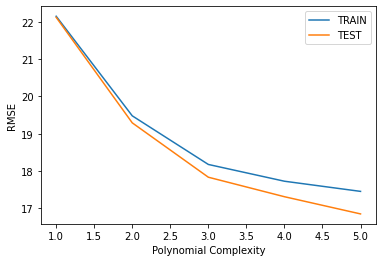

In [58]:
plt.plot(range(1,6),Elastic_train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),Elastic_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

In [59]:
polynomial_converter = PolynomialFeatures(degree=index,include_bias=False)
poly_features = polynomial_converter.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train_norm,y_train)
test_predictions = elastic_model.predict(X_test_norm)
train_predictions = elastic_model.predict(X_train_norm)

In [60]:
elastic_model.l1_ratio_

1.0

In [61]:
elasticMAE = mean_absolute_error(y_test,test_predictions)
elasticMSE = mean_squared_error(y_test,test_predictions)
elasticRMSE = np.sqrt(elasticMSE)

In [62]:
elasticMAE

12.500017912920454

In [63]:
elasticRMSE

17.456135255883723

In [64]:
elastic_model.coef_

array([ 93.10315533, 119.75451275, -71.05923589, ...,   0.        ,
         0.        ,   0.        ])

In [65]:
elastic_model.get_params(deep=True)

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.01,
 'verbose': 0}

### 11- Compare the errors from the 3 regularization techniques, and save the best model.

In [91]:
# ridge of degree 5 is found to be the best model with the best degree here
polynomial_converter = PolynomialFeatures(degree=5,include_bias=False)
poly_features = polynomial_converter.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train_norm,y_train)
test_predictions = ridge_cv_model.predict(X_test_norm)
train_predictions = ridge_cv_model.predict(X_train_norm)


In [60]:
from joblib import dump, load


dump(ridge_cv_model, 'final_model.joblib') 
dump(norm,'norm.joblib')
dump(polynomial_converter,'polynomial_converter.joblib')

['polynomial_converter.joblib']

### 12- Load the best model and test it on a sample that you manually created it.

In [97]:
manualData = [[1361.0,1048.0,1050.0,1687.0,1265.0,11.6,42.9,0.7698,2,9,2010,12,00,00]]
loaded_model = load('final_model.joblib')
norm = load('norm.joblib')
polynomial_converter = load('polynomial_converter.joblib')

poly_features = polynomial_converter.transform(manualData)
X_train_norm = norm.transform(poly_features)
ridge_cv_model.predict(X_train_norm)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([278.65127503])